# Random forest

In [17]:
# import basic libraries
import pandas as pd

# import machine learning libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#import catboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [2]:
#import the data
X_train = pd.read_csv("data/generated/new_documents/X_train.csv")
y_train = pd.read_csv("data/generated/new_documents/y_train.csv")
X_test = pd.read_csv("data/generated/new_documents/X_test.csv")
y_test = pd.read_csv("data/generated/new_documents/y_test.csv")

In [3]:
X_test.head(50)

,Unnamed: 0,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,...,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,event_index_in_trace
0,1080782,Created,User_54,A_Create Application,Application,Application_796205430,complete,2016-11-22 09:22:17.274000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1080783,Created,User_54,A_Create ApplicationW_Complete application,Workflow,Workitem_1369226671,schedule,2016-11-22 09:22:17.285000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1080784,Obtained,User_54,A_Create ApplicationW_Complete applicationW_Co...,Workflow,Workitem_1550461371,start,2016-11-22 09:22:17.288000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1080785,statechange,User_54,A_Create ApplicationW_Complete applicationW_Co...,Application,ApplState_293815231,complete,2016-11-22 09:22:17.291000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1080786,statechange,User_54,A_Create ApplicationW_Complete applicationW_Co...,Application,ApplState_1815775481,complete,2016-11-22 09:24:43.370000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,1080787,Created,User_54,A_Create ApplicationW_Complete applicationW_Co...,Offer,Offer_399297264,complete,2016-11-22 09:25:50.242000+00:00,Unknown,New credit,...,0.0,3081.61,18.0,False,426.13,False,0.0,7300.0,NaN,5
6,1080788,statechange,User_54,A_Create ApplicationW_Complete applicationW_Co...,Offer,OfferState_1589699485,complete,2016-11-22 09:25:50.921000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_399297264,6
7,1080789,statechange,User_54,A_Create ApplicationW_Complete applicationW_Co...,Offer,OfferState_2089218629,complete,2016-11-22 09:26:06.138000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_399297264,7
8,1080790,Deleted,User_54,A_Create ApplicationW_Complete applicationW_Co...,Workflow,Workitem_225326741,complete,2016-11-22 09:26:06.151000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
9,1080791,Created,User_54,A_Create ApplicationW_Complete applicationW_Co...,Workflow,Workitem_216769643,schedule,2016-11-22 09:26:06.160000+00:00,Unknown,New credit,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [4]:
y_test = y_test['remaining_time']
y_train = y_train['remaining_time']

### Pre-process the data

In [5]:
# Convert timestamp to a pandas datetime object
X_train['timestamp'] = pd.to_datetime(X_train['time:timestamp'],format='ISO8601')

# Extract relevant features
X_train['year'] = X_train['timestamp'].dt.year
X_train['month'] = X_train['timestamp'].dt.month
X_train['day'] = X_train['timestamp'].dt.day
X_train['hour'] = X_train['timestamp'].dt.hour
X_train['minute'] = X_train['timestamp'].dt.minute
X_train['second'] = X_train['timestamp'].dt.second
X_train['microsecond'] = X_train['timestamp'].dt.microsecond 

# Drop the original timestamp column
X_train = X_train.drop(['time:timestamp', 'timestamp'], axis=1)

In [6]:
# Convert timestamp to a pandas datetime object
X_test['timestamp'] = pd.to_datetime(X_test['time:timestamp'],format='ISO8601')

# Extract relevant features
X_test['year'] = X_test['timestamp'].dt.year
X_test['month'] = X_test['timestamp'].dt.month
X_test['day'] = X_test['timestamp'].dt.day
X_test['hour'] = X_test['timestamp'].dt.hour
X_test['minute'] = X_test['timestamp'].dt.minute
X_test['second'] = X_test['timestamp'].dt.second
X_test['microsecond'] = X_test['timestamp'].dt.microsecond 

# Drop the original timestamp column
X_test = X_test.drop(['time:timestamp', 'timestamp'], axis=1)

In [7]:
# Drop the offer columns
X_train = X_train.drop(['FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted','MonthlyCost','Selected','CreditScore','OfferedAmount','OfferID','Unnamed: 0'], axis=1)
# Drop the offer columns
X_test = X_test.drop(['FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted','MonthlyCost','Selected','CreditScore','OfferedAmount','OfferID','Unnamed: 0'], axis=1)

In [59]:
#Drop some other unnecessary columns
#X_train = X_train.drop(['Action', 'EventID','case:ApplicationType','EventOrigin','lifecycle:transition'],axis=1)

#Drop some other unnecessary columns
#X_test = X_test.drop(['Action', 'EventID','case:ApplicationType','EventOrigin','lifecycle:transition'],axis=1)

In [60]:
#dropping the ID column
#X_train = X_train.drop(['case:concept:name'],axis=1)
#X_test = X_test.drop(['case:concept:name'],axis=1)

In [9]:
# Separate categorical and numeric features

categorical_features = ['org:resource','concept:name','case:LoanGoal','case:concept:name','Action', 'EventID','case:ApplicationType','EventOrigin','lifecycle:transition']
numeric_features = X_train.columns.difference(categorical_features)

# Convert categorical features to string
X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

In [10]:
# Create a dictionary to store label encoders
label_encoders = {}

# Apply LabelEncoder to each categorical feature in both training and testing datasets
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[feature], X_test[feature]], axis=0))
    X_train[feature] = le.transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    label_encoders[feature] = le


In [11]:
X_test.dtypes

Action                    int32
org:resource              int32
concept:name              int32
EventOrigin               int32
EventID                   int32
lifecycle:transition      int32
case:LoanGoal             int32
case:ApplicationType      int32
case:concept:name         int32
case:RequestedAmount    float64
event_index_in_trace      int64
year                      int32
month                     int32
day                       int32
hour                      int32
minute                    int32
second                    int32
microsecond               int32
dtype: object

### Building the model

In [12]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

### Evaluate the model

In [15]:
# MSE
mean_squared_error(y_test, y_pred)

211.58147444078062

In [16]:
# R2
r2_score(y_test, y_pred)

-0.48462960019793644

### Feature importance

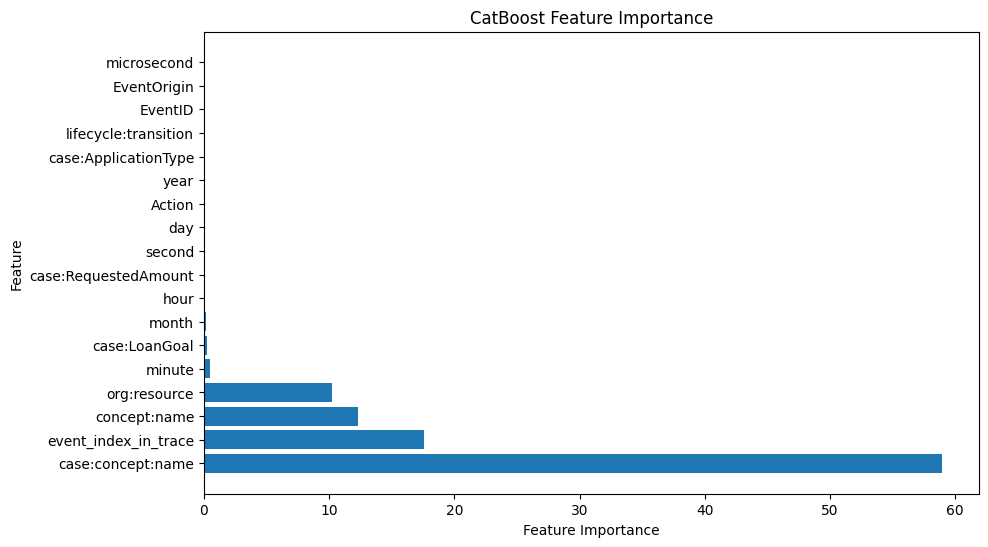

In [68]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained CatBoostRegressor
feature_importance = model.get_feature_importance()

# Get feature names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame to store feature importance values with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.show()

In [69]:
X_train.head()

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,event_index_in_trace,year,month,day,hour,minute,second,microsecond
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,Existing loan takeover,New credit,Application_652823628,20000.0,0,2016,1,1,9,51,15,304000
1,statechange,User_1,A_Create ApplicationA_Submitted,Application,ApplState_1582051990,complete,Existing loan takeover,New credit,Application_652823628,20000.0,1,2016,1,1,9,51,15,352000
2,Created,User_1,A_Create ApplicationA_SubmittedW_Handle leads,Workflow,Workitem_1298499574,schedule,Existing loan takeover,New credit,Application_652823628,20000.0,2,2016,1,1,9,51,15,774000
3,Deleted,User_1,A_Create ApplicationA_SubmittedW_Handle leadsW...,Workflow,Workitem_1673366067,withdraw,Existing loan takeover,New credit,Application_652823628,20000.0,3,2016,1,1,9,52,36,392000
4,Created,User_1,A_Create ApplicationA_SubmittedW_Handle leadsW...,Workflow,Workitem_1493664571,schedule,Existing loan takeover,New credit,Application_652823628,20000.0,4,2016,1,1,9,52,36,403000
